# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [24]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [30]:
# Your work here.
import numpy as np


def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y
#print(df.head())
# Push the temperatures into an array to verify its normal distribution
temp = np.array(df.temperature)

# Find the mean and Standard deviation for the Temperature.
mean = np.mean(temp)
std  = np.std(temp)

# Generate normal distributed random samples
samples = np.random.normal(mean,std,size=100000)

# Computing the theoritical and actual ECDF's
x_theor,y_theor = ecdf(samples)
x,y = ecdf(temp)

print(mean)
print(std)

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
98.24923076923075
0.730357778905038


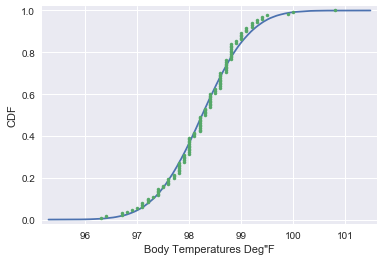

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Body Temperatures Deg"F')
_ = plt.ylabel('CDF')
plt.show()

# 1) The theoretical CDF and the ECDF suggests that Temperatures are 
# normally distributed.

# 2) Samples size is large (100,000) and observations are completely independent.
# Note that the observations are generated randomly using np.random.norm just
# by considering the mean and standard deviation of Actual data

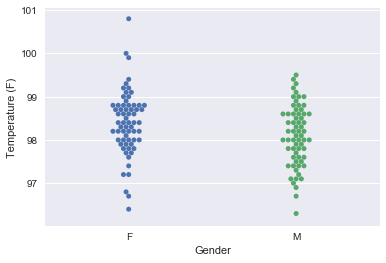

95% confidence interval = [98.12153846 98.37307692]


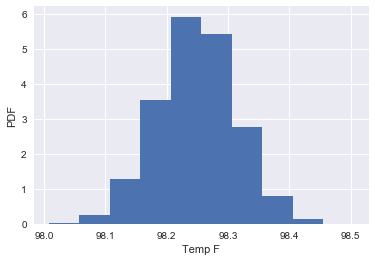

' --> As per the 95% confidence interval and the histogram plots generated by\n using Bootstrap replicates of 10,000 samples, it appears that real mean\n may not be 98.6 F. It looks like the real mean temperature lies within\n the range of [98.12615385 98.37615385] '

In [58]:
#Is the true population mean really 98.6 degrees F?
#First, try a bootstrap hypothesis test.
#Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
#In this situation, is it appropriate to use the t or z statistic?
#Now try using the other test. How is the result be different? Why?
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))
    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(temp,np.mean,10000)
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int)

sns.set()
# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, normed=True)
_ = plt.xlabel('Temp F')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


# Inference:
""" --> As per the 95% confidence interval and the histogram plots generated by
 using Bootstrap replicates of 10,000 samples, it appears that real mean
 may not be 98.6 F. It looks like the real mean temperature lies within
 the range of [98.12615385 98.37615385] """


In [94]:
# We will be using 1 sample bootstrap test as we have to verify 1 parameter i.e. whether the mean temperature 98.6 F
translated_temp = 98.6 + (temp - np.mean(temp))

# Take bootstrap replicates of Translated temperature: bs_replicates
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(temp)) / len(bs_replicates)

# Print the p-value
print('p = ', p)

#Inference
"""P-Value of 0.0 suggests that there is no bootstrap replicated mean atleast as extreme as what was observed mean i.e. Z or T Statistics  may yield the same result i.e. P= 0.0  - Both observed mean & 95% confidence interval is not near to 98.6 F"""

p =  0.0


'P-Value of 0.0 suggests that there is no bootstrap replicated mean atleast as extreme as what was observed mean i.e. Z or T Statistics  may yield the same result i.e. P= 0.0  - Both observed mean & 95% confidence interval is not near to 98.6 F'

In [51]:
"""As per Histogram plotted above for replicates, we can consider someone's temperature to be abnormal when it is beyond 98.5 - Even the confidence intervals of 10000 bootstrap replicates fall within the range of 98.12615385 to 98.37615385"""


"As per Histogram plotted above, we can consider someone's temperature to be abnormal when it is beyond 98.5 - Even the confidence intervals of 10000 bootstrap replicates fall within the range of 98.12615385 to 98.37615385"

In [59]:

""" When we perform 1 draw while calculating the confidence interval of Bootstrap replicates, the value ranges within 98.1 or a maximum of 98.3 - This was the reason for choosing Bootstrap replicates of size 10000 """

# Compute and print SEM
sem = np.std(temp) / np.sqrt(len(temp))
print('Standard error mean is: ', sem)
print('Mean is: ', mean)
# Print the confidence interval
print('95% confidence interval =', conf_int)

Standard error mean is:  0.06405661469519337
Mean is:  98.24923076923075
95% confidence interval = [98.12153846 98.37307692]


Male Values are:  temperature    98.104615
heart_rate     73.369231
dtype: float64
Female Values are:  temperature    98.393846
heart_rate     74.153846
dtype: float64


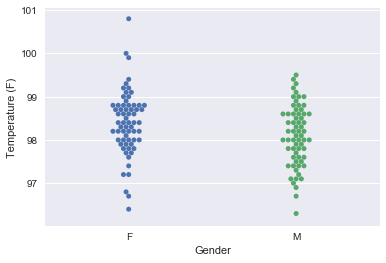

' --> As per the Swarm plot, it looks like Female termperatures are more\n   concentrated at 98.6 than the male counterparts. Also, there are some\n   outliers in Female temperatures.\n   --> Mean value of Female temperatures are more than that of Mean male temperature'

In [84]:
#Compute the mean of female and males separately
df_male = df[(df.gender == 'M')]

df_female = df[(df.gender == 'F')]

print('Male Values are: ', np.mean(df_male))
print('Female Values are: ', np.mean(df_female))

# Make bee swarm plot to analyse the temperature based on GENDER
_ = sns.swarmplot(x='gender',y='temperature',data=df)
# Label axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('Temperature (F)')
# Show the plot
plt.show()

# Inference from Swarm plot
""" --> As per the Swarm plot, it looks like Female termperatures are more
   concentrated at 98.6 than the male counterparts. Also, there are some
   outliers in Female temperatures.
   --> Mean value of Female temperatures are more than that of Mean male temperature"""

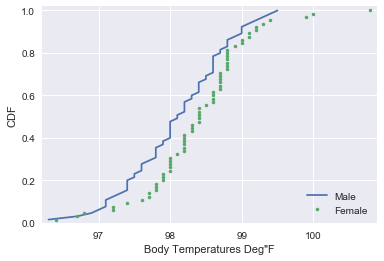

'Data story / Conclusion comments:\n    1) In general, Mean temperature is more in females than that of males.\n    2) AS per the bootstraping tests and confidence intervals, Both actual and observed mean temperatures do not reach the 98.6 F '

In [95]:

df_male = df_male.reset_index(drop=True)
df_female = df_female.reset_index(drop=True)


# Generate normal distributed random samples
temp_male = np.array(df_male.temperature)
temp_female = np.array(df_female.temperature)

x_male, y_male = ecdf(temp_male)
x_female, y_female = ecdf(temp_female)

sns.set()

# Plot the CDFs and show the plot
_ = plt.plot(x_male, y_male)
_ = plt.plot(x_female, y_female, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Body Temperatures Deg"F')
_ = plt.ylabel('CDF')
_ = plt.legend(('Male', 'Female'), loc='lower right')
plt.show()

#Inference: It appears that normal distribution of body temperatures are different for both males and females - Temperature distribution is more for females than males.
# There are some outliers appearing for females.


"""Data story / Conclusion comments:
    1) In general, Mean temperature is more in females than that of males.
    2) AS per the bootstraping tests and confidence intervals, Both actual and observed mean temperatures do not reach the 98.6 F """